## Linear Regression(Using RFE)

_In this notebook I have tried linear regression to predict the car price, I have used RFE for feature selection. furthermore, grid search is used to find the number of features to be used in rfe_

In [1]:
#import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import scale
from sklearn.preprocessing import scale

#import kfold
from sklearn.model_selection import KFold

#import gridsearchcv
from sklearn.model_selection import GridSearchCV

#import RFE
from sklearn.feature_selection import RFE

# import Linear regression
from sklearn.linear_model import LinearRegression

#import train test split
from sklearn.model_selection import train_test_split

#import r2 for model evualation
from sklearn.metrics import r2_score

In [2]:
#read the data
cars = pd.read_csv('cars_dataset_clean.csv')
cars.drop('Unnamed: 0', axis = 1, inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [3]:
cars.shape

(205, 26)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [5]:
#drop the cars id as this would not be required in prediction
cars.drop('car_ID', axis=1, inplace=True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

In [7]:
cars['symboling'] = cars['symboling'].astype('object') 

In [8]:
cars_categorical = cars.select_dtypes(include= ['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [9]:
cars_categorical.shape

(205, 11)

In [10]:
cars_categorical_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_categorical_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def value_checker(col_name):
    return cars[col_name].value_counts()

In [12]:
for i in cars_categorical.columns:
    print(value_checker(i))
    print('*'*60)

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
************************************************************
gas       185
diesel     20
Name: fueltype, dtype: int64
************************************************************
std      168
turbo     37
Name: aspiration, dtype: int64
************************************************************
four    115
two      90
Name: doornumber, dtype: int64
************************************************************
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
************************************************************
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
************************************************************
front    202
rear       3
Name: enginelocation, dtype: int64
************************************************************
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4

In [13]:
cars.shape

(205, 25)

In [14]:
#drop the categorical columns
cars.drop(cars_categorical, axis =1, inplace=True)

In [15]:
cars.shape

(205, 14)

In [16]:
cars = pd.concat([cars, cars_categorical_dummies], axis =1)

In [17]:
cars.shape

(205, 69)

In [18]:
cars.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
symboling_-1              205 non-null uint8
symboling_0               205 non-null uint8
symboling_1               205 non-null uint8
symboling_2               205 non-null uint8
symboling_3               205 non-null uint8
fueltype_gas            

In [20]:
# X & y split
X = cars.drop('price', axis =1)
y = cars.price

In [21]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Sclaing all the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [24]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   train_size=0.7,
                                                   test_size=0.3,
                                                   random_state=40)

In [25]:
# Grid search CV

#creating folds
folds = KFold(n_splits=5, shuffle=True, random_state=100)

#specify hyperparamters
hyper_params = [{'n_features_to_select': list(range(2,40))}]

#specify model
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)

#set up grid search_cv
model_cv = GridSearchCV(estimator=rfe,
                       param_grid=hyper_params,
                       scoring='r2',
                       cv=folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs= -1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 175 out of 190 | elapsed:   10.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   10.3s finished
C:\Users\rdawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [26]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.137045,0.016933,0.003393,0.003815,2,{'n_features_to_select': 2},0.712322,0.673284,0.839691,0.643727,...,0.717492,0.067052,36,0.693638,0.809346,0.768171,0.798515,0.798908,0.773715,0.042337
1,0.136635,0.026530,0.001994,0.000631,3,{'n_features_to_select': 3},0.817568,0.720574,0.864579,0.675851,...,0.706220,0.146467,38,0.796890,0.868796,0.833999,0.850420,0.845840,0.839189,0.023930
2,0.120883,0.010833,0.001795,0.000747,4,{'n_features_to_select': 4},0.829413,0.812420,0.862303,0.735701,...,0.739041,0.150823,33,0.834392,0.904158,0.894407,0.881821,0.850000,0.872956,0.026557
3,0.116489,0.006835,0.002194,0.000399,5,{'n_features_to_select': 5},0.669211,0.814914,0.864962,0.768708,...,0.712257,0.151060,37,0.863963,0.907896,0.897645,0.911010,0.895627,0.895228,0.016692
4,0.124467,0.014499,0.001795,0.000398,6,{'n_features_to_select': 6},0.675174,0.829293,0.873897,0.764830,...,0.718561,0.152295,35,0.864405,0.910425,0.901539,0.912918,0.909751,0.899808,0.018110


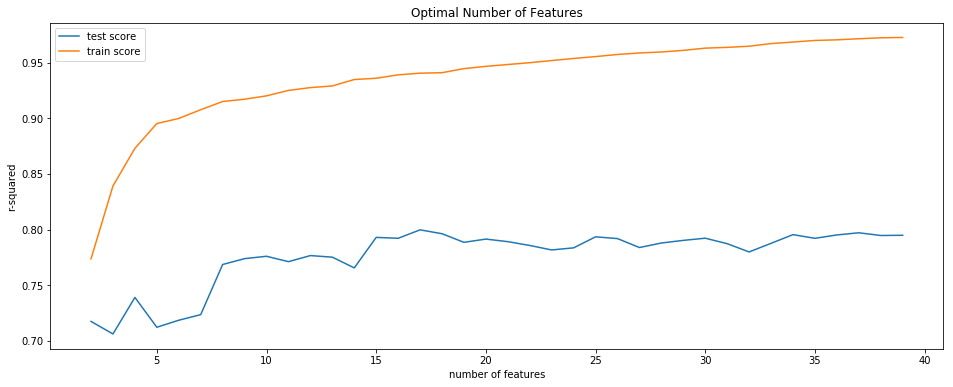

In [27]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [28]:
model_cv.best_params_

{'n_features_to_select': 17}

In [29]:
#final model
features = 17

lm =LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=features)
rfe = rfe.fit(X_train,y_train)

In [30]:
#predit
y_test_pred = rfe.predict(X_test)
r2 = r2_score(y_test,y_test_pred)
print(r2)

0.8442284002519557
